In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

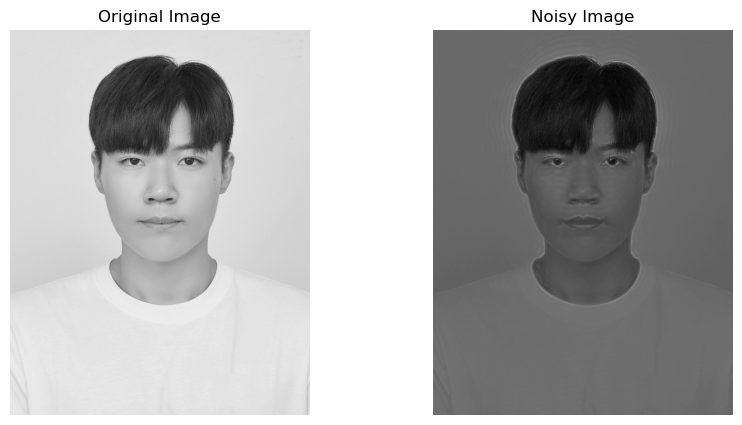

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fixed_frequency_noise(image, magnitude):
    # Fourier 변환 수행
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # 고주파 성분에 노이즈 추가
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # 고주파 성분을 제외한 나머지 성분을 제거
    f_shift = dft_shift * mask
    
    # 노이즈 삽입
    noise = magnitude * np.random.normal(size=f_shift.shape)
    f_shift += noise
    
    # 역 Fourier 변환 수행
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # img_back을 uint8로 변환
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    
    # 원래 이미지와 노이즈가 추가된 이미지를 결합
    combined_image = cv2.addWeighted(image, 0.5, img_back, 0.5, 0)
    
    return combined_image

# 이미지 로드
image = cv2.imread('yeongmin.jpeg', cv2.IMREAD_GRAYSCALE)

# 고정 강도의 노이즈 추가
magnitude = 0  # 노이즈 강도 조절
noisy_image = add_fixed_frequency_noise(image, magnitude)

# 원본 이미지와 노이즈가 추가된 이미지 비교
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.show()

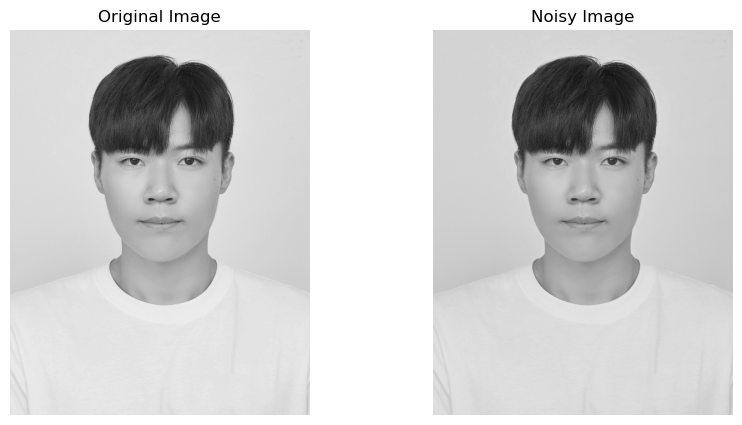

In [9]:
def add_minimal_frequency_noise(image, magnitude):
    # Fourier 변환 수행
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # 최소한의 고주파 성분에 노이즈 추가
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow-15:crow+15, ccol-15:ccol+15] = 0  # 아주 작은 고주파 성분에만 노이즈 추가
    f_shift = dft_shift * mask
    
    # 노이즈 삽입 (노이즈가 거의 없도록 조절)
    noise = magnitude * np.random.normal(size=f_shift.shape)
    f_shift += noise
    
    # 역 Fourier 변환 수행
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # 원본 이미지로의 복귀
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    
    # 원래 이미지와 노이즈가 추가된 이미지를 결합
    combined_image = cv2.addWeighted(image, 0.95, img_back, 0.05, 0)  # 노이즈의 영향을 최소화
    
    return combined_image

# 고정 강도의 노이즈 추가 (노이즈를 거의 제거)
magnitude = 0.1  # 매우 작은 노이즈 적용
noisy_image = add_minimal_frequency_noise(image, magnitude)

# 원본 이미지와 노이즈가 추가된 이미지 비교
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.show()

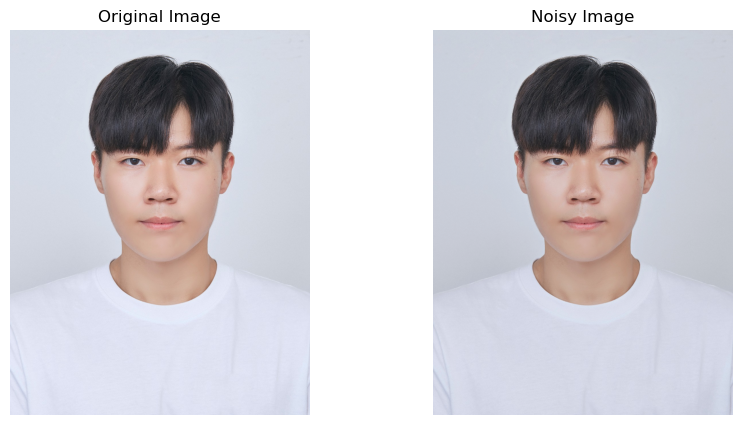

In [17]:
def add_minimal_frequency_noise_color(image, magnitude):
    # 이미지를 BGR 채널로 분리
    b, g, r = cv2.split(image)
    
    # 각각의 채널에 대해 노이즈를 추가한 후, 다시 결합
    b_noisy = add_minimal_frequency_noise(b, magnitude)
    g_noisy = add_minimal_frequency_noise(g, magnitude)
    r_noisy = add_minimal_frequency_noise(r, magnitude)
    
    # BGR 채널을 다시 결합하여 컬러 이미지로 만듦
    noisy_image = cv2.merge([b_noisy, g_noisy, r_noisy])
    
    return noisy_image

def add_minimal_frequency_noise(channel, magnitude):
    # Fourier 변환 수행
    dft = cv2.dft(np.float32(channel), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # 최소한의 고주파 성분에 노이즈 추가
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow-15:crow+15, ccol-15:ccol+15] = 0  # 아주 작은 고주파 성분에만 노이즈 추가
    f_shift = dft_shift * mask
    
    # 노이즈 삽입 (노이즈가 거의 없도록 조절)
    noise = magnitude * np.random.normal(size=f_shift.shape)
    f_shift += noise
    
    # 역 Fourier 변환 수행
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # 원본 이미지로의 복귀
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    
    # 원래 채널과 노이즈가 추가된 이미지를 결합
    combined_channel = cv2.addWeighted(channel, 0.95, img_back, 0.05, 0)  # 노이즈의 영향을 최소화
    
    return combined_channel

# 이미지 로드 (컬러 이미지)
image = cv2.imread('yeongmin.jpeg')

# 고정 강도의 노이즈 추가 (노이즈를 거의 제거)
magnitude = 0.1  # 매우 작은 노이즈 적용
noisy_image = add_minimal_frequency_noise_color(image, magnitude)

# 노이즈가 추가된 이미지를 파일로 저장
cv2.imwrite('noised.jpg', noisy_image)

# 원본 이미지와 노이즈가 추가된 이미지 비교
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


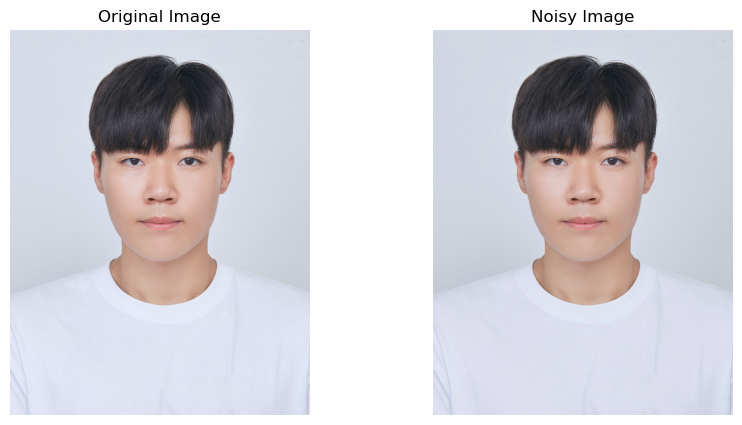

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_minimal_frequency_noise_color(image, magnitude):
    # 이미지를 BGR 채널로 분리
    b, g, r = cv2.split(image)
    
    # 각각의 채널에 대해 노이즈를 추가한 후, 다시 결합
    b_noisy = add_minimal_frequency_noise(b, magnitude)
    g_noisy = add_minimal_frequency_noise(g, magnitude)
    r_noisy = add_minimal_frequency_noise(r, magnitude)
    
    # BGR 채널을 다시 결합하여 컬러 이미지로 만듦
    noisy_image = cv2.merge([b_noisy, g_noisy, r_noisy])
    
    return noisy_image

def add_minimal_frequency_noise(channel, magnitude):
    # Fourier 변환 수행
    dft = cv2.dft(np.float32(channel), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # 최소한의 고주파 성분에 노이즈 추가
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow-15:crow+15, ccol-15:ccol+15] = 0  # 아주 작은 고주파 성분에만 노이즈 추가
    f_shift = dft_shift * mask
    
    # 노이즈 삽입 (노이즈가 거의 없도록 조절)
    noise = magnitude * np.random.normal(size=f_shift.shape)
    f_shift += noise
    
    # 역 Fourier 변환 수행
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # 원본 이미지로의 복귀
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    
    # 원래 채널과 노이즈가 추가된 이미지를 결합 (노이즈 비중을 더 줄임)
    combined_channel = cv2.addWeighted(channel, 0.98, img_back, 0.02, 0)  # 노이즈의 비중을 더 줄여 밝기 유지
    
    return combined_channel

# 이미지 로드 (컬러 이미지)
image = cv2.imread('yeongmin.jpeg')

# 고정 강도의 노이즈 추가 (노이즈를 거의 제거)
magnitude = 20 # 매우 작은 노이즈 적용
noisy_image = add_minimal_frequency_noise_color(image, magnitude)

# 노이즈가 추가된 이미지를 파일로 저장
cv2.imwrite('noised.jpg', noisy_image)

# 원본 이미지와 노이즈가 추가된 이미지 비교
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

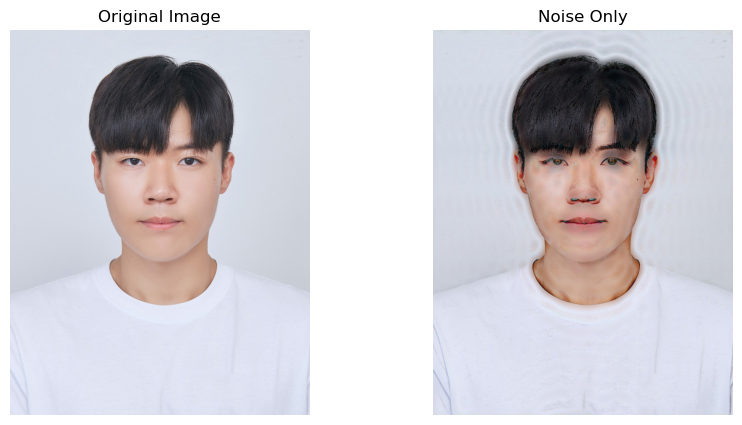

In [23]:
def add_minimal_frequency_noise(channel, magnitude):
    # Fourier 변환 수행
    dft = cv2.dft(np.float32(channel), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # 최소한의 고주파 성분에 노이즈 추가
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow-15:crow+15, ccol-15:ccol+15] = 0  # 아주 작은 고주파 성분에만 노이즈 추가
    f_shift = dft_shift * mask
    
    # 노이즈 삽입 (노이즈가 거의 없도록 조절)
    noise = magnitude * np.random.normal(size=f_shift.shape)
    f_shift += noise
    
    # 역 Fourier 변환 수행
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # 원본 이미지로의 복귀
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    
    # 원래 채널과 노이즈가 추가된 이미지 간의 차이 계산
    noise_only = cv2.absdiff(channel, img_back)
    
    return noise_only

def visualize_noise(image, magnitude):
    # 이미지를 BGR 채널로 분리
    b, g, r = cv2.split(image)
    
    # 각각의 채널에 대해 노이즈를 추가한 후, 노이즈만 추출
    b_noise = add_minimal_frequency_noise(b, magnitude)
    g_noise = add_minimal_frequency_noise(g, magnitude)
    r_noise = add_minimal_frequency_noise(r, magnitude)
    
    # BGR 채널을 다시 결합하여 노이즈만 추출된 컬러 이미지로 만듦
    noise_image = cv2.merge([b_noise, g_noise, r_noise])
    
    return noise_image

# 이미지 로드 (컬러 이미지)
image = cv2.imread('yeongmin.jpeg')

# 고정 강도의 노이즈 추가 (노이즈를 거의 제거)
magnitude = 20  # 매우 작은 노이즈 적용
noise_image = visualize_noise(image, magnitude)

# 원본 이미지와 노이즈만 추출한 이미지 비교
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noise Only')
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


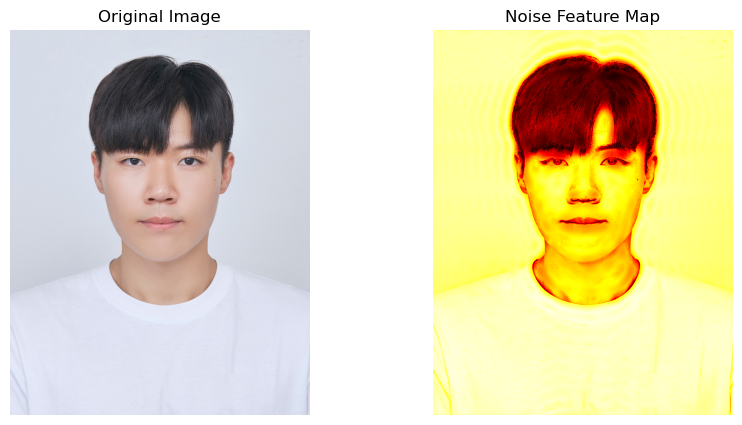

In [16]:
def add_minimal_frequency_noise(channel, magnitude):
    # Fourier 변환 수행
    dft = cv2.dft(np.float32(channel), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # 최소한의 고주파 성분에 노이즈 추가
    rows, cols = channel.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow-15:crow+15, ccol-15:ccol+15] = 0  # 아주 작은 고주파 성분에만 노이즈 추가
    f_shift = dft_shift * mask
    
    # 노이즈 삽입 (노이즈가 거의 없도록 조절)
    noise = magnitude * np.random.normal(size=f_shift.shape)
    f_shift += noise
    
    # 역 Fourier 변환 수행
    f_ishift = np.fft.ifftshift(f_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    # 원본 이미지로의 복귀
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    
    # 원래 채널과 노이즈가 추가된 이미지 간의 차이 계산
    noise_only = cv2.absdiff(channel, img_back)
    
    return noise_only

def visualize_noise(image, magnitude):
    # 이미지를 BGR 채널로 분리
    b, g, r = cv2.split(image)
    
    # 각각의 채널에 대해 노이즈를 추가한 후, 노이즈만 추출
    b_noise = add_minimal_frequency_noise(b, magnitude)
    g_noise = add_minimal_frequency_noise(g, magnitude)
    r_noise = add_minimal_frequency_noise(r, magnitude)
    
    # BGR 채널을 다시 결합하여 노이즈만 추출된 컬러 이미지로 만듦
    noise_image = cv2.merge([b_noise, g_noise, r_noise])
    
    return noise_image

# 고정 강도의 노이즈 추가 (노이즈를 거의 제거)
magnitude = 0.1  # 매우 작은 노이즈 적용
noise_image = visualize_noise(image, magnitude)

# 노이즈만 추출한 이미지를 grayscale로 변환하여 feature map처럼 보이게 만듦
noise_feature_map = cv2.cvtColor(noise_image, cv2.COLOR_BGR2GRAY)

# 원본 이미지와 노이즈 맵 비교 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noise Feature Map')
plt.imshow(noise_feature_map, cmap='hot')  # feature map처럼 보기 위해 'hot' 컬러맵 사용
plt.axis('off')

plt.show()